In [161]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn import linear_model

In [162]:
df = pd.read_csv('auto-mpg.csv')

In [163]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [164]:
num_df = df.select_dtypes([np.number])
obj_df = df.select_dtypes(include=['object'])

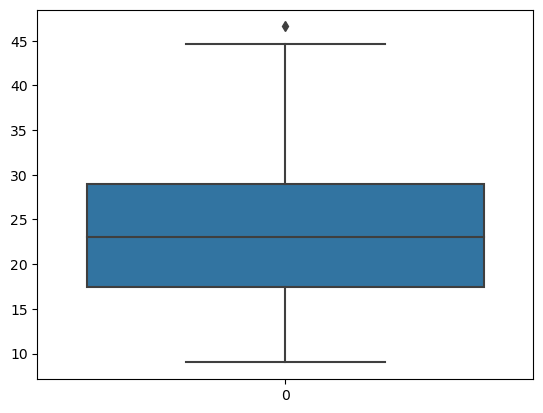

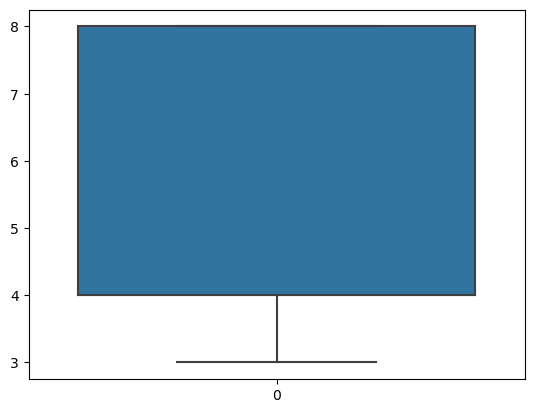

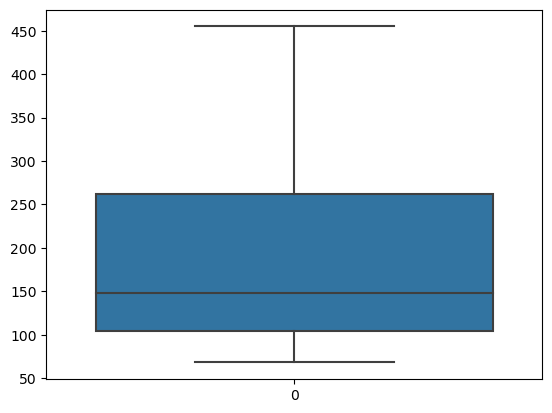

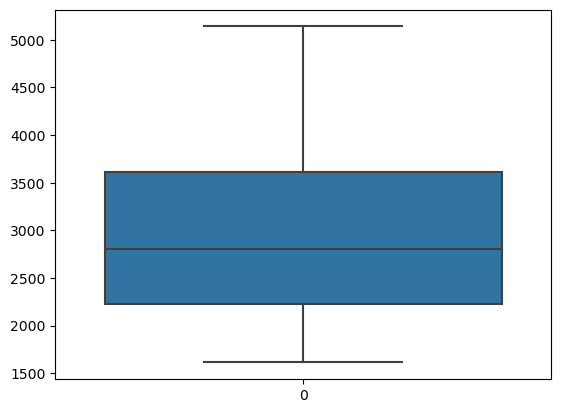

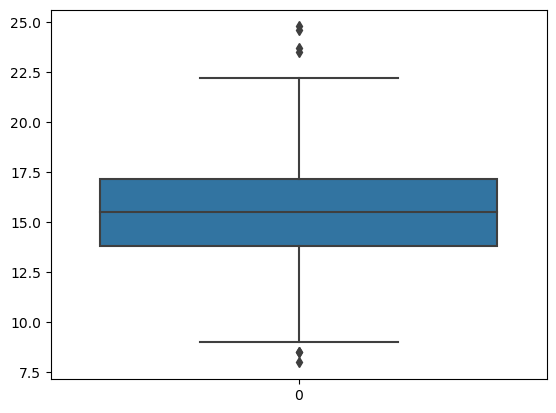

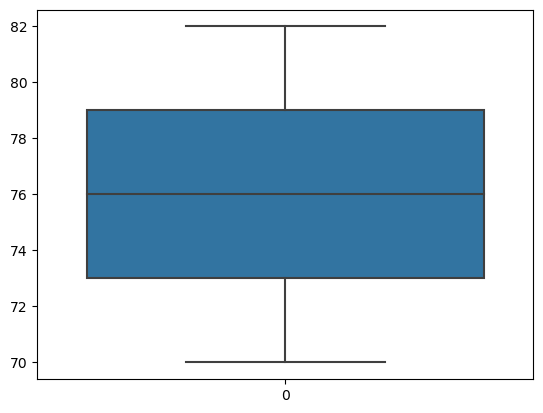

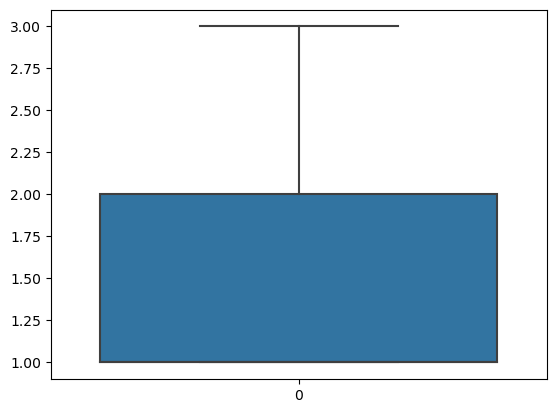

In [165]:
for i in num_df.columns:
    sns.boxplot(num_df[i])
    plt.show()

In [166]:
def outliers(df, ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr
    ls = df.index[(df[ft] > ub) | (df[ft] < lb)]
    return ls

def replace_outliers_with_mean(df, ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr

    outliers_indices = df.index[(df[ft] >= ub) | (df[ft] <= lb)]


    df.loc[outliers_indices, ft] = df[ft].mean()

    return df

index_ls = []

for i in num_df.columns:
    index_ls.extend(outliers(num_df, i))
print(index_ls)

for i in num_df.columns:
    num_df = replace_outliers_with_mean(num_df, i)

[322, 7, 9, 11, 59, 299, 326, 394]


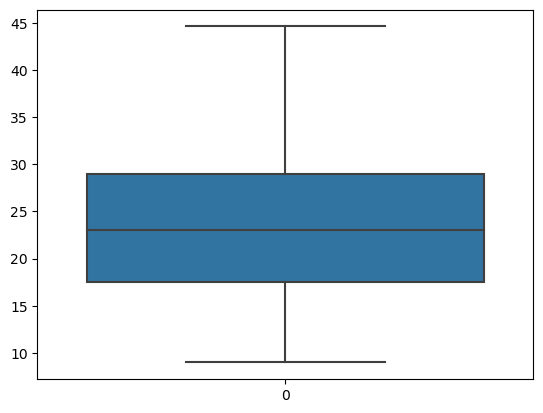

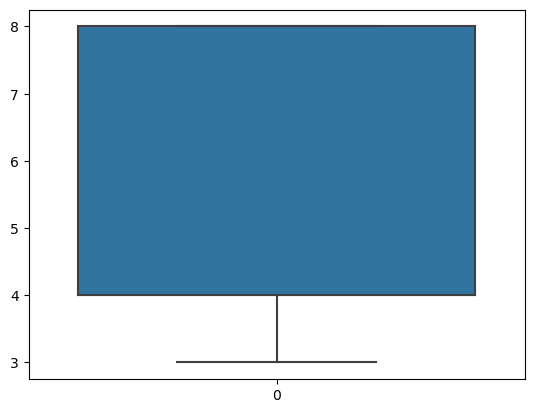

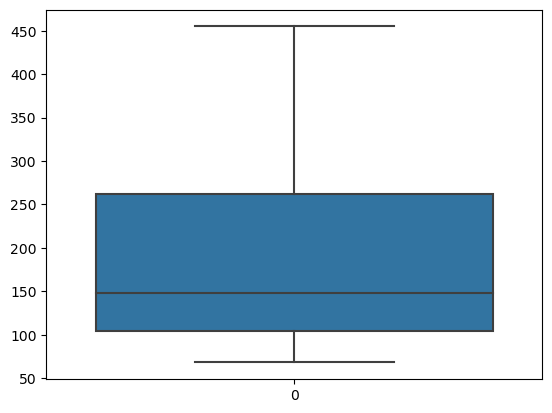

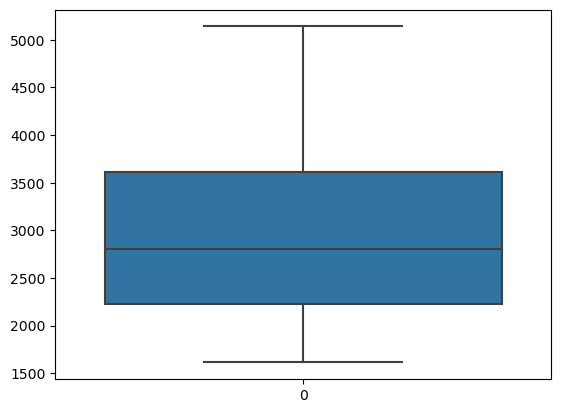

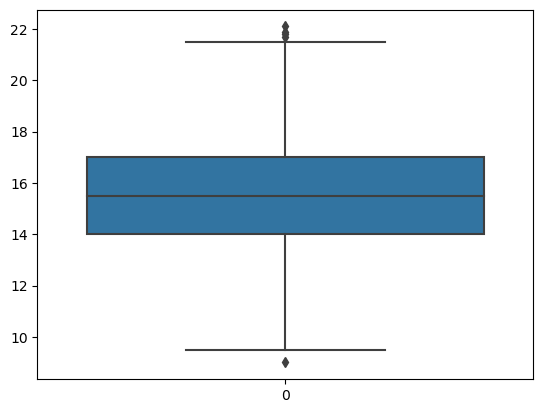

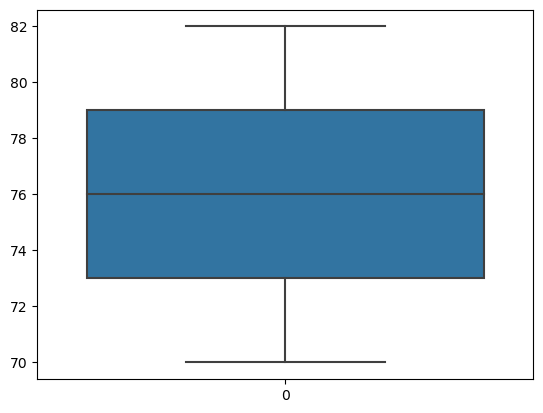

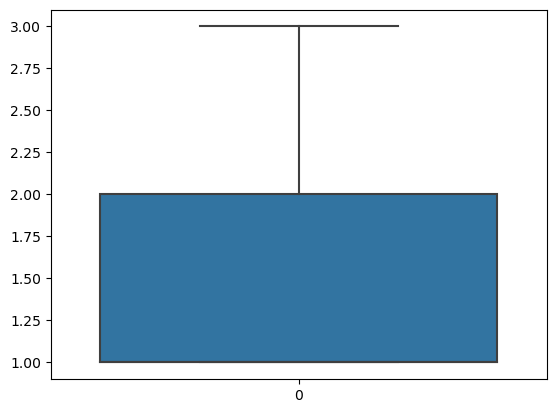

In [167]:
for i in num_df.columns:
    sns.boxplot(num_df[i])
    plt.show()

C:\Users\ADK15\AppData\Local\Temp\ipykernel_27584\2615055963.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df)


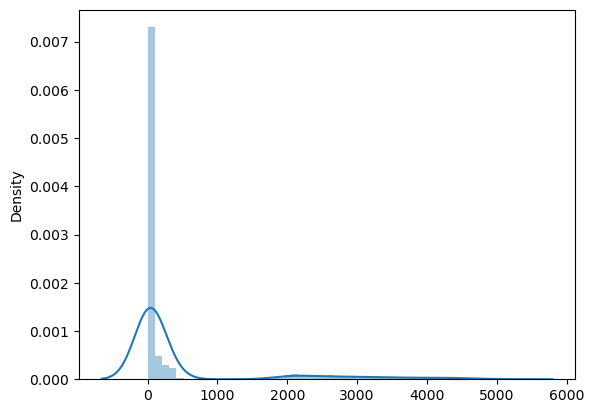

In [168]:
sns.distplot(num_df)
plt.show()

In [169]:
# pt = PowerTransformer(method='yeo-johnson')
# num_df = pd.DataFrame(pt.fit_transform(num_df),columns=num_df.columns)
# sns.distplot(num_df)
# plt.show()

In [170]:
from sklearn.calibration import LabelEncoder


le = LabelEncoder()
obj_df = obj_df.apply(le.fit_transform)


In [171]:
num_df

,mpg,cylinders,displacement,weight,acceleration,model year,origin
0,18.0,8,307.0,3504,12.00000,70,1
1,15.0,8,350.0,3693,11.50000,70,1
2,18.0,8,318.0,3436,11.00000,70,1
3,16.0,8,304.0,3433,12.00000,70,1
4,17.0,8,302.0,3449,10.50000,70,1
...,...,...,...,...,...,...,...
393,27.0,4,140.0,2790,15.60000,82,1
394,44.0,4,97.0,2130,15.56809,82,2
395,32.0,4,135.0,2295,11.60000,82,1
396,28.0,4,120.0,2625,18.60000,82,1


In [172]:
result_df = pd.concat([num_df, obj_df], axis=1)

In [173]:
result_df

,mpg,cylinders,displacement,weight,acceleration,model year,origin,horsepower,car name
0,18.0,8,307.0,3504,12.00000,70,1,15,49
1,15.0,8,350.0,3693,11.50000,70,1,33,36
2,18.0,8,318.0,3436,11.00000,70,1,27,231
3,16.0,8,304.0,3433,12.00000,70,1,27,14
4,17.0,8,302.0,3449,10.50000,70,1,22,161
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,2790,15.60000,82,1,80,153
394,44.0,4,97.0,2130,15.56809,82,2,51,301
395,32.0,4,135.0,2295,11.60000,82,1,78,119
396,28.0,4,120.0,2625,18.60000,82,1,73,159


In [177]:
from sklearn.metrics import r2_score


X = result_df.iloc[:, 1:]
y = result_df.iloc[:, :1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)    
print(r2_score(y_test, y_pred))

0.8443102305226398


In [181]:
ridge = linear_model.Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print(r2_score(y_test, y_pred))


0.8472273911114008


In [182]:
elastic = linear_model.ElasticNet(alpha=0.1)
elastic.fit(X_train, y_train)
y_pred = elastic.predict(X_test)
print(r2_score(y_test, y_pred))


0.8448705666238476
